In [18]:
import pandas
import configparser
import psycopg2

In [19]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd=config['myaws']['pwd']

In [20]:
conn = psycopg2.connect(host=host,
                       user=user,
                       password=pwd,
                       dbname=db)

In [21]:
sql = "select * from student"

In [22]:
df = pandas.read_sql_query(sql,conn)

df[:]

,s_email,s_name,major
0,s1@jmu.edu,s1,IA
1,s2@jmu.edu,s2,IA
2,s3@jmu.edu,s3,ISAT
3,s4@jmu.edu,s4,ISAT
4,s5@jmu.edu,s5,GS


In [23]:
sql = """
        select professor.p_name, course.c_name 
        from professor 
        inner join course 
        on professor.p_email = course.p_email
"""

In [24]:
df = pandas.read_sql_query(sql,conn)

df[:]

,p_name,c_name
0,p2,mongodb
1,p3,postgresql
2,p3,twitter


In [25]:
sql = """
        select count(*) as num_stu, c_number
        from enroll
        group by c_number
"""

<AxesSubplot:xlabel='c_number'>

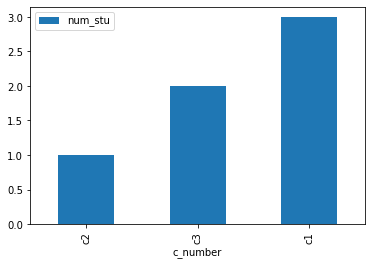

In [26]:
df = pandas.read_sql_query(sql,conn)

df.plot.bar(x='c_number', y='num_stu')

In [27]:
sql = """
        select professor.p_name,count(*) as num_course
        from professor
        inner join course
        on professor.p_email = course.p_email
        group by professor.p_name
"""

<AxesSubplot:xlabel='p_name'>

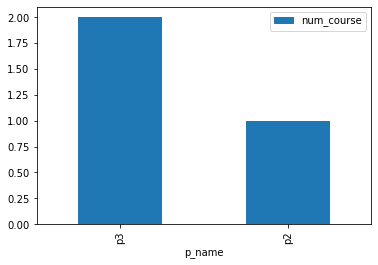

In [28]:
df = pandas.read_sql_query(sql,conn)

df.plot.bar(x='p_name', y='num_course')

In [29]:
sql = """
    insert into professor(p_email,p_name,office)
    values('{}','{}','{}')
    """.format('p4@jmu.edu', 'p4', 'o4')
print(sql)


    insert into professor(p_email,p_name,office)
    values('p4@jmu.edu','p4','o4')
    


In [30]:
cur=conn.cursor()

In [31]:
cur.execute(sql)

In [32]:
conn.commit()

In [33]:
df = pandas.read_sql_query('select * from professor',conn)
df[:]

,p_email,p_name,office
0,p2@jmu.edu,p2,o2
1,p3@jmu.edu,p3,o3
2,p4@jmu.edu,p4,o4


In [66]:
sql = """
    insert into course(c_number,c_name,room,p_email)
    values('{}','{}','{}','{}')
    """.format('c5', 'linkedin', 'r2', 'p4@jmu.edu')
print(sql)


    insert into course(c_number,c_name,room,p_email)
    values('c5','linkedin','r2','p4@jmu.edu')
    


In [67]:
cur.execute(sql)

In [68]:
conn.commit()

In [69]:
df = pandas.read_sql_query('select * from course',conn)
df[:]

,c_number,c_name,room,p_email
0,c2,mongodb,r2,p2@jmu.edu
1,c1,postgresql,r1,p3@jmu.edu
2,c3,twitter,r1,p3@jmu.edu
3,c5,linkedin,r2,p4@jmu.edu


In [105]:
sql = """
    update course
    set p_email = '{}'
    where p_email = '{}'
    """.format('p4@jmu.edu','p2@jmu.edu')
print(sql)


    update course
    set p_email = 'p4@jmu.edu'
    where p_email = 'p2@jmu.edu'
    


In [106]:
cur.execute(sql)

In [107]:
conn.commit()

In [108]:
df = pandas.read_sql_query('select * from course',conn)
df[:]

,c_number,c_name,room,p_email
0,c1,postgresql,r1,p3@jmu.edu
1,c3,twitter,r1,p3@jmu.edu
2,c5,linkedin,r2,p4@jmu.edu
3,c2,mongodb,r2,p4@jmu.edu


In [109]:
sql = """
    delete from professor
    where p_email = '{}'
    """.format('p2@jmu.edu')
print(sql)


    delete from professor
    where p_email = 'p2@jmu.edu'
    


In [110]:
cur.execute(sql)

In [111]:
conn.commit()

In [112]:
df = pandas.read_sql_query('select * from professor',conn)
df[:]

,p_email,p_name,office
0,p3@jmu.edu,p3,o3
1,p4@jmu.edu,p4,o4


In [113]:
cur.close()
conn.close()